# Time Varying mass func
## The nonlocal breather

In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

### Idea is to follow the Nov 1 2021 work where i used energy density to get a guess at a vacuum breather.

### Make time tick regular, waves get longer - example cos w (t - r/y*r/c) or similar, y is the length



![alt-text](img/schwarschild.png "Schwarschild coords")


In [6]:
syms = sympy.symbols("t r theta phi")
G, M, F, a, w, v = sympy.symbols("G M F a w v")
a = M*(1 - F*sin(w*(syms[0] - ln(syms[1]*F))))
v = syms[1]/ln(syms[1]*F)

mT = sympy.diff(a, syms[0])
print(mT)
mR = sympy.diff(a, syms[1])
print(mR)


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -mT*mT/(v*v*mR*mR)/(1 - 2*a/syms[1])

#list2d[0][0] = -1/(v*v)*1/(1 - 2*a/syms[1])

list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/syms[1]) 
list2d[2][2] = (syms[1])**2
list2d[3][3] = (syms[1])**2*(sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()



-F*M*w*cos(w*(t - log(F*r)))
F*M*w*cos(w*(t - log(F*r)))/r


⎡                  2                                                                               ⎤
⎢              -log (F⋅r)                                                                          ⎥
⎢────────────────────────────────────────                     0                      0       0     ⎥
⎢  2⋅M⋅(-F⋅sin(w⋅(t - log(F⋅r))) + 1)                                                              ⎥
⎢- ────────────────────────────────── + 1                                                          ⎥
⎢                  r                                                                               ⎥
⎢                                                                                                  ⎥
⎢                                                             1                                    ⎥
⎢                   0                      ────────────────────────────────────────  0       0     ⎥
⎢                                            2⋅M⋅(-F⋅sin(w⋅(t - log(F⋅r))) + 1)            

(t, r, theta, phi, F, M, w)


Text(0.5, 1.0, 'g_ab')

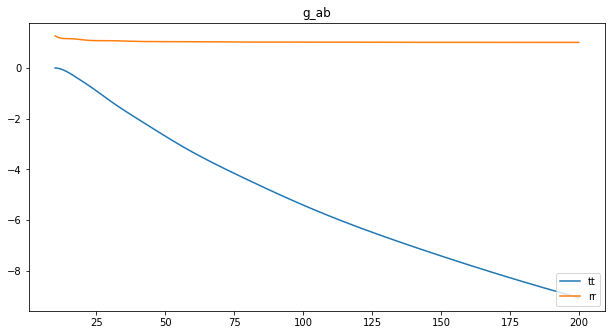

In [11]:
###Plot something
# first make the tensor into a function, printing 
args2, func2 = sch.tensor_lambdify()
print(args2) # these are the argument values 

t = 1

theta = 1
phi = 1
F = 0.1
M = 1
w = 10


#Make x values - which we will sub in for r 
x = np.arange(10.0, 200.0, 0.04)

# Call the functions
tt = func2(t,x,theta, phi, F, M, w)[0][0]

tr = func2(t,x,theta, phi, F, M, w)[0][1]

rr = func2(t,x,theta, phi, F, M, w)[1][1] 

hh = func2(t,x,theta, phi, F, M, w)[2][2]/(x*x)

pp = func2(t,x,theta, phi, F, M, w)[3][3]/(x*x*sin(theta)*sin(theta))


fig2=plt.figure(figsize=(8, 4))
ax2=fig2.add_axes([0,2,1.0,1.0])
ax2.plot(x,tt, label="tt")
ax2.plot(x,rr, label="rr")
#ax2.plot(x,tr)

#ax2.plot(x,hh)

#ax2.plot(x,pp)


ax2.legend(loc="lower right")



ax2.set_title("g_ab")




#NOT Zero 


In [ ]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr


In [6]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                                                                                                     
⎢                                                      

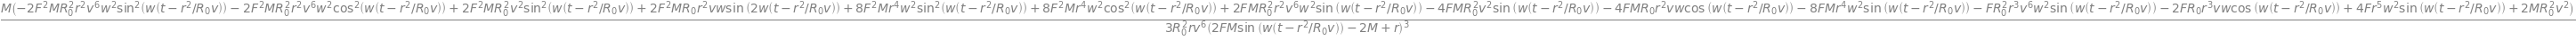

In [7]:
weyl[0,1,0,1]

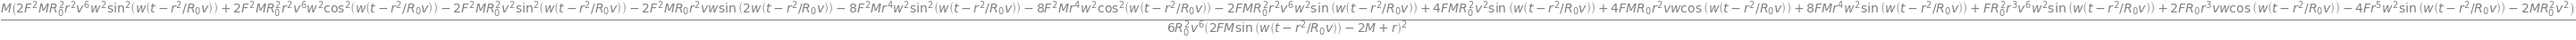

In [8]:
weyl[0,2,0,2]

In [9]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.9, 20.0, 0.04)
func(0.5,x,0, 0, 1, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")




(t, r, theta, phi, F, M, R0, v, w)


TypeError: _lambdifygenerated() missing 3 required positional arguments: 'R0', 'v', and 'w'